<a href="https://colab.research.google.com/github/eduzera0/property_sao_paulo/blob/main/sao_paulo_propriedades_predict_price_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_data = pd.read_csv('/content/sao-paulo-properties-april-2019.csv')

In [ ]:
px.set_mapbox_access_token(open("mapbox_token").read())

FileNotFoundError: [Errno 2] No such file or directory: 'mapbox_token'

In [ ]:
df_data.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486  
1 -23.550239 -46.480718  
2 -23.542818 -46.485665  
3 -23.547171 -46.483014  
4 -23.525025 -46.482436

In [ ]:
df_rent = df_data[df_data['Negotiation Type'] == 'rent']

In [ ]:
fig = px.scatter_mapbox(df_rent, lat='Latitude', lon='Longitude', color='Price', size='Size',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, opacity=0.4)
fig.update_coloraxes(colorscale= [[0, 'rgb(166,206,227, 0.5)'],
                                  [0.02, 'rgb(31,120,180,0.5)'],
                                  [0.10, 'rgb(51,160,44,0.5)'],
                                  [0.15, 'rgb(251, 154, 153, 0.5)'],
                                  [1, 'rgb(227,26,28,0.5)']
                                  ],
                     )

fig.update_layout(height=800, mapbox=dict(center=go.layout.mapbox.Center(lat=-23.543138, lon=-46.69486)))
fig.show()

In [ ]:
df_rent.shape

(7228, 16)

In [ ]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

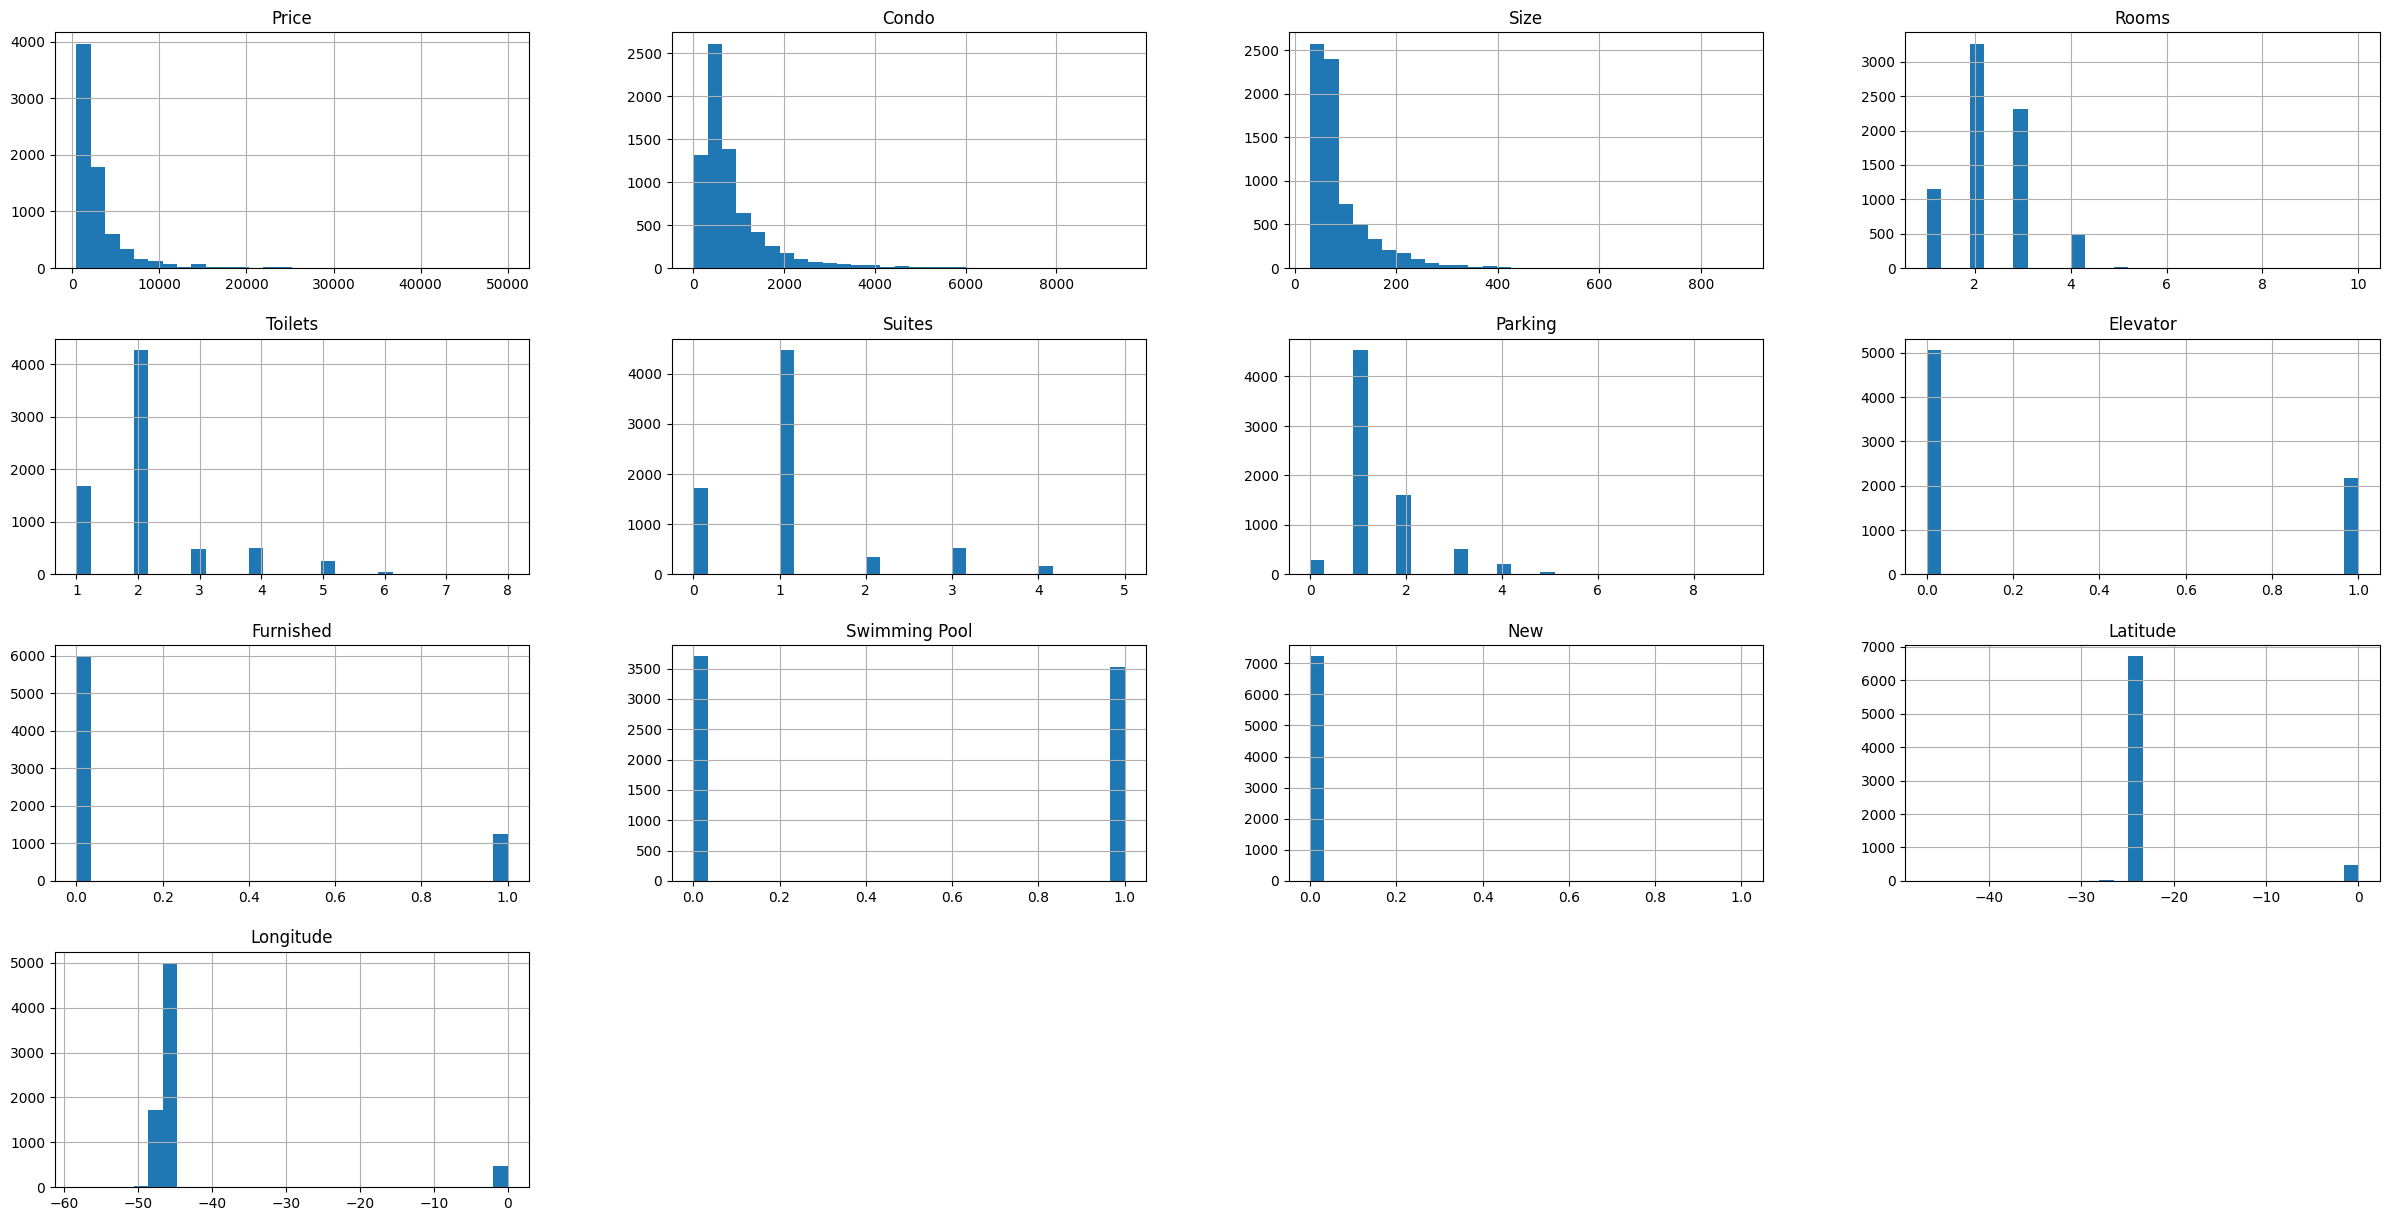

In [ ]:
df_rent.hist(bins=30, figsize=(30,15))

In [ ]:
df_rent['Property Type'].value_counts()

Property Type
apartment    7228
Name: count, dtype: int64

In [ ]:
df_rent['District'].value_counts()

District
Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: count, Length: 94, dtype: int64

In [ ]:
df_rent.corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

In [ ]:
import sklearn

In [ ]:
df_cleaned = df_rent.drop(['New', 'Property Type', 'Negotiation Type'], axis=1)

In [ ]:
df_cleaned

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
0        930    220    47      2        2       1        1         0   
1       1000    148    45      2        2       1        1         0   
2       1000    100    48      2        2       1        1         0   
3       1000    200    48      2        2       1        1         0   
4       1300    410    55      2        2       1        1         1   
...      ...    ...   ...    ...      ...     ...      ...       ...   
11205   3700    595    73      1        2       1        1         0   
11206  21000   3000   208      4        4       3        3         1   
11207   3800    710    55      1        1       0        1         0   
11208   5000   2354   205      3        2       1        2         1   
11209  15600   2300   162      3        4       3        3         0   

       Furnished  Swimming Pool               District   Latitude  Longitude  
0              0              0  Artur Alvim/São Paulo -23.543138 -46.479486  
1              0              0  Artur Alvim/São Paulo -23.550239 -46.480718  
2              0              0  Artur Alvim/São Paulo -23.542818 -46.485665  
3              0              0  Artur Alvim/São Paulo -23.547171 -46.483014  
4              0              0  Artur Alvim/São Paulo -23.525025 -46.482436  
...          ...            ...                    ...        ...        ...  
11205          0              1     Brooklin/São Paulo -23.617682 -46.694963  
11206          1              1     Brooklin/São Paulo -23.606891 -46.695934  
11207          1              1     Brooklin/São Paulo   0.000000   0.000000  
11208          0              0     Brooklin/São Paulo -23.612287 -46.681482  
11209          0              1     Brooklin/São Paulo -23.615823 -46.685404  

[7228 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

district_encoder = ordinal_encoder.fit_transform(df_rent[['District']])

In [ ]:
district_encoder

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(df_rent[['District']])
housing_cat_1hot

<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
one_hot = pd.get_dummies(df_rent['District'])
df = df_cleaned.drop('District', axis=1)
df = df.join(one_hot)
df

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
0        930    220    47      2        2       1        1         0   
1       1000    148    45      2        2       1        1         0   
2       1000    100    48      2        2       1        1         0   
3       1000    200    48      2        2       1        1         0   
4       1300    410    55      2        2       1        1         1   
...      ...    ...   ...    ...      ...     ...      ...       ...   
11205   3700    595    73      1        2       1        1         0   
11206  21000   3000   208      4        4       3        3         1   
11207   3800    710    55      1        1       0        1         0   
11208   5000   2354   205      3        2       1        2         1   
11209  15600   2300   162      3        4       3        3         0   

       Furnished  Swimming Pool  ...  Vila Jacuí/São Paulo  \
0              0              0  ...                 False   
1              0              0  ...                 False   
2              0              0  ...                 False   
3              0              0  ...                 False   
4              0              0  ...                 False   
...          ...            ...  ...                   ...   
11205          0              1  ...                 False   
11206          1              1  ...                 False   
11207          1              1  ...                 False   
11208          0              0  ...                 False   
11209          0              1  ...                 False   

       Vila Leopoldina/São Paulo  Vila Madalena/São Paulo  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                          False                    False   
4                          False                    False   
...                          ...                      ...   
11205                      False                    False   
11206                      False                    False   
11207                      False                    False   
11208                      False                    False   
11209                      False                    False   

       Vila Maria/São Paulo  Vila Mariana/São Paulo  Vila Matilde/São Paulo  \
0                     False                   False                   False   
1                     False                   False                   False   
2                     False                   False                   False   
3                     False                   False                   False   
4                     False                   False                   False   
...                     ...                     ...                     ...   
11205                 False                   False                   False   
11206                 False                   False                   False   
11207                 False                   False                   False   
11208                 False                   False                   False   
11209                 False                   False                   False   

       Vila Olimpia/São Paulo  Vila Prudente/São Paulo  Vila Sônia/São Paulo  \
0                       False                    False                 False   
1                       False                    False                 False   
2                       False                    False                 False   
3                       False                    False                 False   
4                       False                    False                 False   
...                       ...                      ...                   ...   
11205                   False                    False                 False   
11206                   False                    False                 Fals

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y = df['Price']
X = df.loc[:, df.columns != 'Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
#regressão linear
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
alguns_dados = x_train.iloc[:5]
algumas_labels = y_train.iloc[:5]

print("Predições:", lin_reg.predict(alguns_dados))
print("Labels:", algumas_labels.values)

Predições: [7300.3267783  6227.11392679  869.39499736 3050.32369822 1237.2109582 ]
Labels: [5000 5500 1400 2500 1000]


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1985.0824402112119

In [ ]:
#árvore de regressão
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

37.417291012746446

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [3112.74204069 2582.7993493  2764.27084012 2427.99553881 2589.92036595
 1848.41364472 2581.1265633  2314.44988214 2335.47497748 2658.16885215]
Mean: 2521.536205464969
Standard deviation: 312.8003937854167


In [ ]:
scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [2346.33892918 2285.19621919 2359.40838859 1717.97521664 2000.66911145
 1820.29096513 2133.28559629 1716.30963266 1953.54565142 1908.17429299]
Mean: 2024.1194003540102
Standard deviation: 233.51948042630116


In [ ]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
preds = forest_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, preds)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


726.75085835673

In [ ]:
scores = cross_val_score(forest_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [2598.55364957 2131.61721448 2151.62635465 1490.43198432 1860.4044589
 1705.00152111 1901.12318522 1592.17038442 1664.48523159 1977.20356615]
Mean: 1907.2617550397822
Standard deviation: 311.1170729030666


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

random_forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(random_forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


1597.4457504426905

In [ ]:
fig = go.Figure(data=[go.Scatter(y=y_test.values), go.Scatter(y=final_predictions)])
fig.show()